In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from models import vae
from sklearn.decomposition import PCA
import sys

In [2]:
########## Define Parameters ##########

In [3]:
LAYERS = 4
EPOCHS = 200
BATCH_SIZE = 256
template_file = '../data/pdbs/ubq.pdb'

In [4]:
########## Data Source ##########

In [5]:
# load data
data = np.load("../data/features/ubq.npz")
coor_encode = data['coor'][::4]  # use every frame from the data
coor_encode.shape

(20000, 1806)

In [6]:
# scale data
scaler = MinMaxScaler()
coor_encode_scaled = scaler.fit_transform(coor_encode)

In [7]:
########## Build VAE ##########

In [94]:
# hidden layers
hidden_layers = [2]
while len(hidden_layers) <= LAYERS:
    hidden_layers.append(hidden_layers[-1] * 4
                         if hidden_layers[-1] * 4 <= coor_encode_scaled.shape[1]
                         else coor_encode_scaled.shape[1])
hidden_layers = hidden_layers[::-1]
hidden_layers.pop()
hidden_layers
input_dim = (coor_encode_scaled.shape[1],)
encoder_1, decoder_1, model_1 = vae.build_vae(input_dim, hidden_layers, latent_dim=2)
print(encoder_1.summary())

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1806)]       0                                            
__________________________________________________________________________________________________
dense_77 (Dense)                (None, 512)          925184      input_15[0][0]                   
__________________________________________________________________________________________________
dense_78 (Dense)                (None, 128)          65664       dense_77[0][0]                   
__________________________________________________________________________________________________
dense_79 (Dense)                (None, 32)           4128        dense_78[0][0]                   
___________________________________________________________________________________________

In [95]:
%%time
history_1 = model_1.fit(
    x=coor_encode_scaled,
    y=coor_encode_scaled,
    shuffle=True,
    epochs=EPOCHS,
    verbose=0,
    batch_size=BATCH_SIZE)

CPU times: user 1min 48s, sys: 20.9 s, total: 2min 8s
Wall time: 1min 4s


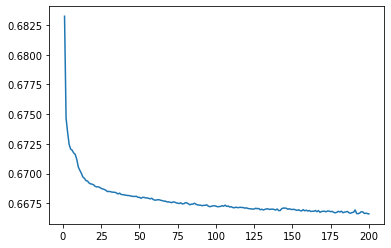

In [96]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(history_1.history['loss'])+1)), [x/1806 for x in history_1.history['loss']])
plt.show()

In [97]:
data_latent_1 = encoder_1.predict(coor_encode_scaled)[0]
data_latent_1.shape

(20000, 2)

In [98]:
data_latent_1[:10]

array([[-0.70025223, -0.27503526],
       [-0.555851  , -0.45866656],
       [-0.5799091 , -0.36370456],
       [ 0.02617984,  0.2316932 ],
       [-0.02839619,  0.23888268],
       [-0.05034692,  0.09420563],
       [-0.03877599,  0.21892546],
       [ 0.05531233,  0.1951238 ],
       [ 0.10816102,  0.17618383],
       [ 0.16185707,  0.13502933]], dtype=float32)

In [99]:
coor_decode_scaled_1 = decoder_1(data_latent_1).numpy()
coor_decode_scaled_1.shape

(20000, 1806)

In [100]:
coor_decode_1 = scaler.inverse_transform(coor_decode_scaled_1)
coor_decode_1.shape

(20000, 1806)

In [101]:
%%time
rmsd_1 = np.sqrt(
    np.sum(
        np.square(
            coor_decode_1 * 10 - coor_encode * 10
        ), axis=1
    ) / (coor_encode.shape[1] // 3)
)
rmsd_1.shape

CPU times: user 154 ms, sys: 124 ms, total: 278 ms
Wall time: 275 ms


(20000,)

In [102]:
rmsd_1.max(), rmsd_1.min(), np.median(rmsd_1), rmsd_1.mean(), rmsd_1.std()

(2.1078074, 0.5950581, 1.1005739, 1.1209904, 0.18591036)

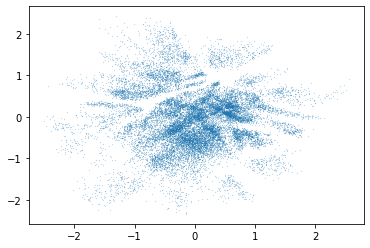

In [103]:
plt.scatter(data_latent_1[:,0], data_latent_1[:,1], s=0.01)
plt.show()

In [135]:
statistics.variance(data_latent_1[:,0].tolist())

0.49694146397388794

In [136]:
statistics.variance(data_latent_1[:,1].tolist())

0.5117081569505254

In [20]:
########## Build VAE ##########

In [21]:
# hidden layers
hidden_layers = [4]
while len(hidden_layers) <= LAYERS:
    hidden_layers.append(hidden_layers[-1] * 4
                         if hidden_layers[-1] * 4 <= coor_encode_scaled.shape[1]
                         else coor_encode_scaled.shape[1])
hidden_layers = hidden_layers[::-1]
hidden_layers.pop()
hidden_layers
input_dim = (coor_encode_scaled.shape[1],)
encoder_2, decoder_2, model_2 = vae.build_vae(input_dim, hidden_layers, latent_dim=4)
print(encoder_2.summary())

[1024, 256, 64, 16]

In [24]:
%%time
history_2 = model_2.fit(
    x=coor_encode_scaled,
    y=coor_encode_scaled,
    shuffle=True,
    epochs=EPOCHS,
    verbose=0,
    batch_size=BATCH_SIZE)

CPU times: user 1min 48s, sys: 21.8 s, total: 2min 10s
Wall time: 1min 5s


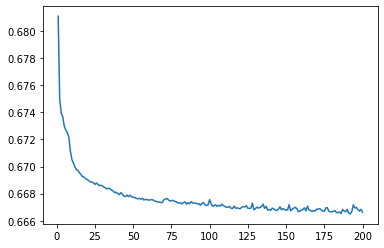

In [25]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(history_2.history['loss'])+1)), [x/1806 for x in history_2.history['loss']])
plt.show()

In [26]:
data_latent_2 = encoder_2.predict(coor_encode_scaled)[0]
data_latent_2.shape

(20000, 4)

In [27]:
data_latent_2[:10]

array([[ 0.00425222,  0.00398343, -0.5590763 , -0.01463479],
       [ 0.00350997,  0.00367815, -0.4855954 ,  0.06900708],
       [ 0.00386908,  0.00323127, -0.43729293,  0.02149516],
       [ 0.00399213,  0.0038385 , -0.20156693,  0.01008755],
       [ 0.00448383,  0.00137666, -0.14557153, -0.08238578],
       [ 0.00386092,  0.00358917, -0.1757654 ,  0.02595103],
       [ 0.00493364,  0.00190642, -0.15250522, -0.12584656],
       [ 0.00400994,  0.00353682, -0.13060617,  0.00649041],
       [ 0.00395006,  0.00296889, -0.3127421 ,  0.00729394],
       [ 0.00368297,  0.00239249, -0.23536038,  0.03021172]],
      dtype=float32)

In [28]:
coor_decode_scaled_2 = decoder_2(data_latent_2).numpy()
coor_decode_scaled_2.shape

(20000, 1806)

In [29]:
coor_decode_2 = scaler.inverse_transform(coor_decode_scaled_2)
coor_decode_2.shape

(20000, 1806)

In [30]:
%%time
rmsd_2 = np.sqrt(
    np.sum(
        np.square(
            coor_decode_2 * 10 - coor_encode * 10
        ), axis=1
    ) / (coor_encode.shape[1] // 3)
)
rmsd_2.shape

CPU times: user 148 ms, sys: 134 ms, total: 282 ms
Wall time: 279 ms


(20000,)

In [31]:
rmsd_2.max(), rmsd_2.min(), np.median(rmsd_2), rmsd_2.mean(), rmsd_2.std()

(2.3263113, 0.61213535, 1.1045452, 1.124304, 0.18762134)

In [32]:
pca = PCA(n_components=2)

In [164]:
data_latent_2_pca = pca.fit_transform(data_latent_2)

In [34]:
pca.explained_variance_ratio_

array([0.6028291 , 0.39716882], dtype=float32)

In [35]:
pca.singular_values_

array([112.618996,  91.411766], dtype=float32)

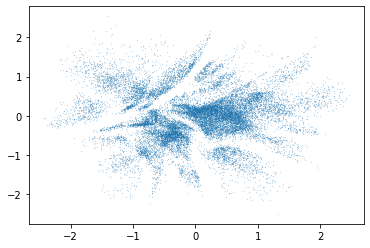

In [36]:
plt.scatter(data_latent_2_pca[:,0], data_latent_2_pca[:,1], s=0.01)
plt.show()

In [165]:
pca.components_

array([[-5.8421972e-03, -2.5061308e-04, -7.0807117e-01,  7.0611703e-01],
       [ 6.3703777e-03,  7.0746575e-04, -7.0614105e-01, -7.0804226e-01]],
      dtype=float32)

In [38]:
pca.get_covariance()

array([[ 3.96743781e-05,  2.81143139e-06,  7.43875746e-04,
        -4.50077560e-03],
       [ 2.81143161e-06,  1.32180423e-06, -9.61790283e-05,
        -3.21503903e-04],
       [ 7.43875746e-04, -9.61790356e-05,  5.26300132e-01,
        -1.08175829e-01],
       [-4.50077606e-03, -3.21503874e-04, -1.08175844e-01,
         5.25671244e-01]], dtype=float32)

In [39]:
pca.get_precision()

array([[ 9.3199794e+05, -5.5649619e+00,  3.3712115e+02,  8.0491001e+03],
       [-5.5649624e+00,  9.3206706e+05,  3.0019662e+02,  6.3178687e+02],
       [ 3.3712152e+02,  3.0019662e+02,  2.1875000e+00,  3.5061729e+00],
       [ 8.0491001e+03,  6.3178680e+02,  3.5061729e+00,  7.1937500e+01]],
      dtype=float32)

In [41]:
pca.score(data_latent_2)

7.6602807

In [107]:
import statistics

In [112]:
statistics.variance(data_latent_2[:,0].tolist())

3.891133068949403e-05

In [113]:
statistics.variance(data_latent_2[:,1].tolist())

4.3878746209377085e-06

In [114]:
statistics.variance(data_latent_2[:,2].tolist())

0.5263003757774288

In [116]:
statistics.variance(data_latent_2[:,3].tolist())

0.5256711400328862

In [20]:
########## Build VAE ##########

In [21]:
# hidden layers
hidden_layers = [5]
while len(hidden_layers) <= LAYERS:
    hidden_layers.append(hidden_layers[-1] * 4
                         if hidden_layers[-1] * 4 <= coor_encode_scaled.shape[1]
                         else coor_encode_scaled.shape[1])
hidden_layers = hidden_layers[::-1]
hidden_layers.pop()
hidden_layers
input_dim = (coor_encode_scaled.shape[1],)
encoder_3, decoder_3, model_3 = vae.build_vae(input_dim, hidden_layers, latent_dim=5)
print(encoder_3.summary())

[1024, 256, 64, 16]

In [24]:
%%time
history_3 = model_3.fit(
    x=coor_encode_scaled,
    y=coor_encode_scaled,
    shuffle=True,
    epochs=EPOCHS,
    verbose=0,
    batch_size=BATCH_SIZE)

CPU times: user 1min 48s, sys: 21.8 s, total: 2min 10s
Wall time: 1min 5s


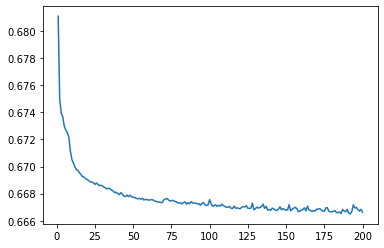

In [25]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(history_3.history['loss'])+1)), [x/1806 for x in history_3.history['loss']])
plt.show()

In [26]:
data_latent_3 = encoder_3.predict(coor_encode_scaled)[0]
data_latent_3.shape

(20000, 4)

In [27]:
data_latent_3[:10]

array([[ 0.00425222,  0.00398343, -0.5590763 , -0.01463479],
       [ 0.00350997,  0.00367815, -0.4855954 ,  0.06900708],
       [ 0.00386908,  0.00323127, -0.43729293,  0.02149516],
       [ 0.00399213,  0.0038385 , -0.20156693,  0.01008755],
       [ 0.00448383,  0.00137666, -0.14557153, -0.08238578],
       [ 0.00386092,  0.00358917, -0.1757654 ,  0.02595103],
       [ 0.00493364,  0.00190642, -0.15250522, -0.12584656],
       [ 0.00400994,  0.00353682, -0.13060617,  0.00649041],
       [ 0.00395006,  0.00296889, -0.3127421 ,  0.00729394],
       [ 0.00368297,  0.00239249, -0.23536038,  0.03021172]],
      dtype=float32)

In [28]:
coor_decode_scaled_3 = decoder_3(data_latent_3).numpy()
coor_decode_scaled_3.shape

(20000, 1806)

In [29]:
coor_decode_3 = scaler.inverse_transform(coor_decode_scaled_3)
coor_decode_3.shape

(20000, 1806)

In [30]:
%%time
rmsd_3 = np.sqrt(
    np.sum(
        np.square(
            coor_decode_3 * 10 - coor_encode * 10
        ), axis=1
    ) / (coor_encode.shape[1] // 3)
)
rmsd_3.shape

CPU times: user 148 ms, sys: 134 ms, total: 282 ms
Wall time: 279 ms


(20000,)

In [170]:
rmsd_3.max(), rmsd_3.min(), np.median(rmsd_3), rmsd_3.mean(), rmsd_3.std()

(1.7515129, 0.55815834, 0.90314966, 0.926184, 0.16164595)

In [153]:
pca_5 = PCA(n_components=2)

In [166]:
data_latent_3_pca = pca_5.fit_transform(data_latent_3)

In [167]:
pca_5.components_

array([[-5.53396881e-01,  2.59369668e-02,  6.27274692e-01,
        -5.47360003e-01,  1.64906320e-03],
       [-6.10411882e-01, -4.66036081e-01, -6.28188908e-01,
        -1.24845006e-01, -4.51359985e-04]], dtype=float32)

In [168]:
pca.components_

array([[-5.8421972e-03, -2.5061308e-04, -7.0807117e-01,  7.0611703e-01],
       [ 6.3703777e-03,  7.0746575e-04, -7.0614105e-01, -7.0804226e-01]],
      dtype=float32)

In [169]:
np.savez(
    'ubq_dim245.npz',
    data_latent_1=data_latent_1,
    rmsd_1=rmsd_1,
    data_latent_2=data_latent_2,
    rmsd_2=rmsd_2,
    data_latent_2_pca=data_latent_2_pca,
    pca_2_components=pca.components_,
    data_latent_3=data_latent_3,
    rmsd_3=rmsd_3,
    data_latent_3_pca=data_latent_3_pca,
    pca_3_components=pca_5.components_
)